In [3]:
import pandas as pd
import os

In [4]:
current_dir = os.getcwd()

In [5]:
model_names = []
for dir in os.listdir(os.path.join(current_dir)):
    dir = str(dir)
    if dir.endswith('.py'):
        model_names.append(dir.replace('.py',''))
model_names

['model_training-v1_weightscale',
 'model_training-v2_weightclamp',
 'model_training-v3_focalloss']

In [6]:
model_dirs = ['models_v'+ str(i) for i in range(1,4)]
model_sum_df = pd.DataFrame(columns= ['model_name','model_with_parameter' ,'weight', 'epoch','alpha', 'acc', 'precision', 'recall', 'path'])
for i , model_dir in enumerate(model_dirs):
    model_df = pd.read_csv(os.path.join(current_dir, model_dir, 'model_df.csv'))
    model_name = model_names[i]
    for index, row in model_df.iterrows():
        where_epoch = row['Model'].find('_epoch')
        parameter = row['Model'][0:where_epoch]
        model_with_parameter = model_name + '_' + parameter
        if 'weight' in row:
            weight = row['weight']
        else:
            weight = 'None'
        if 'alpha' in row:
            alpha = row['alpha']
        else:
            alpha = 'None'
        path = os.path.join(model_dir, row['Model'])
        model_sum_df.loc[len(model_sum_df)] = [model_name, model_with_parameter,weight, row['epoch'], alpha, row['acc'], row['precision'], row['recall'], path]
model_sum_df

,model_name,model_with_parameter,weight,epoch,alpha,acc,precision,recall,path
0,model_training-v1_weightscale,model_training-v1_weightscale_weight_0,0.0,0,None,0.916903,0.742917,0.338083,models_v1\weight_0_epoch00_acc0.9169_prec0.742...
1,model_training-v1_weightscale,model_training-v1_weightscale_weight_0,0.0,1,None,0.919708,0.740428,0.380926,models_v1\weight_0_epoch01_acc0.9197_prec0.740...
2,model_training-v1_weightscale,model_training-v1_weightscale_weight_0,0.0,2,None,0.921768,0.760359,0.389434,models_v1\weight_0_epoch02_acc0.9218_prec0.760...
3,model_training-v1_weightscale,model_training-v1_weightscale_weight_0,0.0,3,None,0.924156,0.767635,0.414574,models_v1\weight_0_epoch03_acc0.9242_prec0.767...
4,model_training-v1_weightscale,model_training-v1_weightscale_weight_0,0.0,4,None,0.926254,0.791658,0.419028,models_v1\weight_0_epoch04_acc0.9263_prec0.791...
...,...,...,...,...,...,...,...,...,...
695,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,45,0.75,0.898633,0.526172,0.500846,models_v3\alpha_0.75_epoch45_acc0.8986_prec0.5...
696,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,46,0.75,0.900391,0.535560,0.499285,models_v3\alpha_0.75_epoch46_acc0.9004_prec0.5...
697,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,47,0.75,0.900024,0.533487,0.500700,models_v3\alpha_0.75_epoch47_acc0.9000_prec0.5...
698,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,48,0.75,0.899439,0.530410,0.500441,models_v3\alpha_0.75_epoch48_acc0.8994_prec0.5...


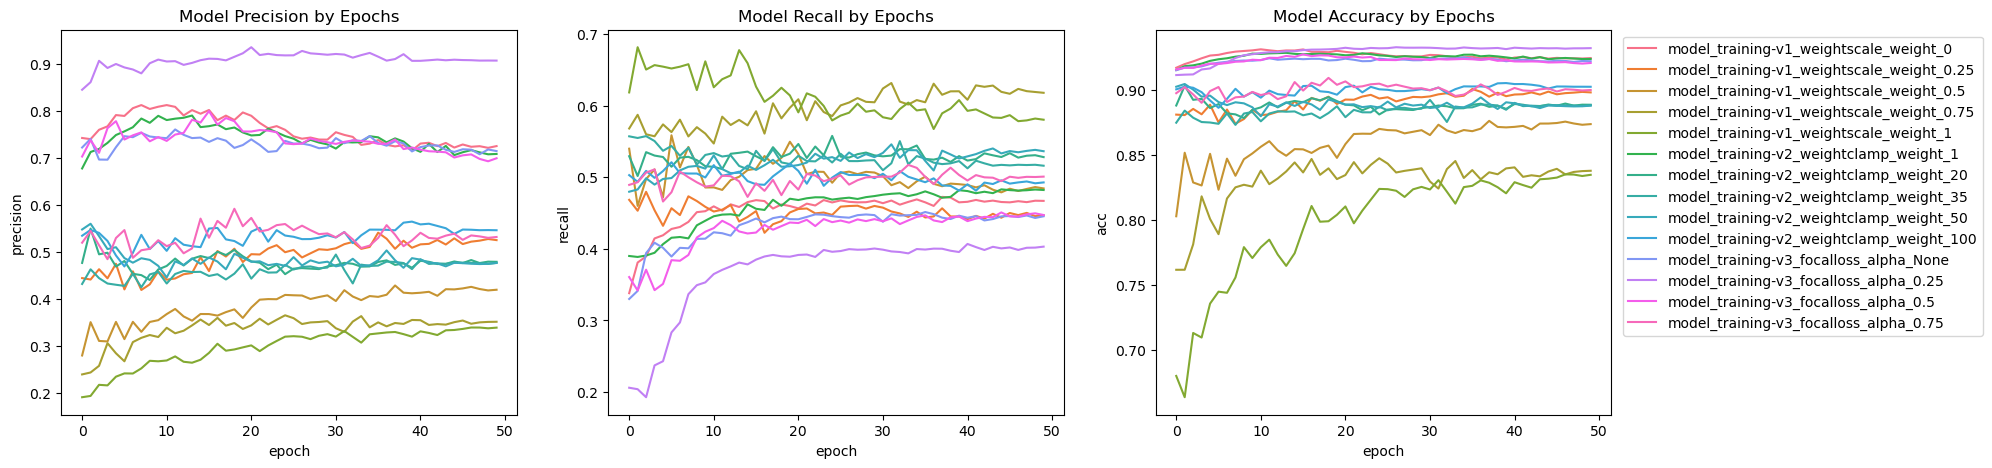

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.lineplot(data=model_sum_df, x='epoch', y='precision', hue='model_with_parameter', ax=ax[0],legend=False)
sns.lineplot(data=model_sum_df, x='epoch', y='recall', hue='model_with_parameter', ax=ax[1],legend=False)
sns.lineplot(data=model_sum_df, x='epoch', y='acc', hue='model_with_parameter', ax=ax[2])

ax[0].set_title('Model Precision by Epochs')
ax[1].set_title('Model Recall by Epochs')
ax[2].set_title('Model Accuracy by Epochs')

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title('Model Accuracy by Epochs')
plt.show()


In [10]:
model_converged = model_sum_df[model_sum_df['epoch']>30].copy()
model_converged

,model_name,model_with_parameter,weight,epoch,alpha,acc,precision,recall,path
31,model_training-v1_weightscale,model_training-v1_weightscale_weight_0,0.0,31,None,0.926519,0.749435,0.467561,models_v1\weight_0_epoch31_acc0.9265_prec0.749...
32,model_training-v1_weightscale,model_training-v1_weightscale_weight_0,0.0,32,None,0.925737,0.745211,0.461790,models_v1\weight_0_epoch32_acc0.9257_prec0.745...
33,model_training-v1_weightscale,model_training-v1_weightscale_weight_0,0.0,33,None,0.924453,0.728211,0.465661,models_v1\weight_0_epoch33_acc0.9245_prec0.728...
34,model_training-v1_weightscale,model_training-v1_weightscale_weight_0,0.0,34,None,0.924936,0.730881,0.469144,models_v1\weight_0_epoch34_acc0.9249_prec0.730...
35,model_training-v1_weightscale,model_training-v1_weightscale_weight_0,0.0,35,None,0.925363,0.738509,0.465067,models_v1\weight_0_epoch35_acc0.9254_prec0.738...
...,...,...,...,...,...,...,...,...,...
695,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,45,0.75,0.898633,0.526172,0.500846,models_v3\alpha_0.75_epoch45_acc0.8986_prec0.5...
696,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,46,0.75,0.900391,0.535560,0.499285,models_v3\alpha_0.75_epoch46_acc0.9004_prec0.5...
697,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,47,0.75,0.900024,0.533487,0.500700,models_v3\alpha_0.75_epoch47_acc0.9000_prec0.5...
698,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,48,0.75,0.899439,0.530410,0.500441,models_v3\alpha_0.75_epoch48_acc0.8994_prec0.5...


In [11]:
acc_summary = model_converged[['model_with_parameter','acc']].groupby('model_with_parameter').mean().sort_values('acc',ascending=False)
acc_summary

,acc
model_with_parameter,
model_training-v3_focalloss_alpha_0.25,0.931843
model_training-v2_weightclamp_weight_1,0.924989
model_training-v1_weightscale_weight_0,0.924617
model_training-v3_focalloss_alpha_None,0.922829
model_training-v3_focalloss_alpha_0.5,0.922080
model_training-v2_weightclamp_weight_100,0.902516
model_training-v3_focalloss_alpha_0.75,0.899487
model_training-v1_weightscale_weight_0.25,0.897057
model_training-v2_weightclamp_weight_50,0.888115


In [12]:
precision_summary = model_converged[['model_with_parameter','acc','precision','recall']].groupby('model_with_parameter').mean().sort_values('precision',ascending=False)
precision_summary

,acc,precision,recall
model_with_parameter,,,
model_training-v3_focalloss_alpha_0.25,0.931843,0.911726,0.399819
model_training-v1_weightscale_weight_0,0.924617,0.729466,0.466487
model_training-v3_focalloss_alpha_None,0.922829,0.725316,0.445446
model_training-v2_weightclamp_weight_1,0.924989,0.724905,0.478840
model_training-v3_focalloss_alpha_0.5,0.922080,0.718542,0.443797
model_training-v2_weightclamp_weight_100,0.902516,0.548222,0.492940
model_training-v3_focalloss_alpha_0.75,0.899487,0.530891,0.502360
model_training-v1_weightscale_weight_0.25,0.897057,0.520557,0.447262
model_training-v2_weightclamp_weight_50,0.888115,0.478334,0.533336


In [13]:
max_precision_model = precision_summary['precision'].idxmax()
max_precision_model

'model_training-v3_focalloss_alpha_0.25'

In [14]:
recall_summary = precision_summary.sort_values('recall',ascending=False)
recall_summary

,acc,precision,recall
model_with_parameter,,,
model_training-v1_weightscale_weight_0.75,0.836142,0.349011,0.618323
model_training-v1_weightscale_weight_1,0.828183,0.329518,0.588542
model_training-v2_weightclamp_weight_50,0.888115,0.478334,0.533336
model_training-v2_weightclamp_weight_20,0.887747,0.476602,0.530247
model_training-v2_weightclamp_weight_35,0.886814,0.472769,0.521040
model_training-v3_focalloss_alpha_0.75,0.899487,0.530891,0.502360
model_training-v2_weightclamp_weight_100,0.902516,0.548222,0.492940
model_training-v1_weightscale_weight_0.5,0.871940,0.415029,0.487797
model_training-v2_weightclamp_weight_1,0.924989,0.724905,0.478840


In [15]:
max_recall_model = recall_summary['recall'].idxmax()
max_recall_model

'model_training-v1_weightscale_weight_0.75'

In [16]:
print('best model for precision:', max_precision_model, 'with precision of', precision_summary.loc[max_precision_model]['precision'], ', recall: ' ,  recall_summary.loc[max_precision_model]['recall'], ', acc: ', acc_summary.loc[max_precision_model]['acc']),print('best model for recall:', max_recall_model, 'with recall of', recall_summary.loc[max_recall_model]['recall'], 'precision: ', precision_summary.loc[max_recall_model]['precision'], ', acc: ', acc_summary.loc[max_recall_model]['acc'])

best model for precision: model_training-v3_focalloss_alpha_0.25 with precision of 0.9117257587860198 , recall:  0.399819047481119 , acc:  0.9318433777685511
best model for recall: model_training-v1_weightscale_weight_0.75 with recall of 0.618323238226737 precision:  0.34901127209039196 , acc:  0.8361422148010617


(None, None)

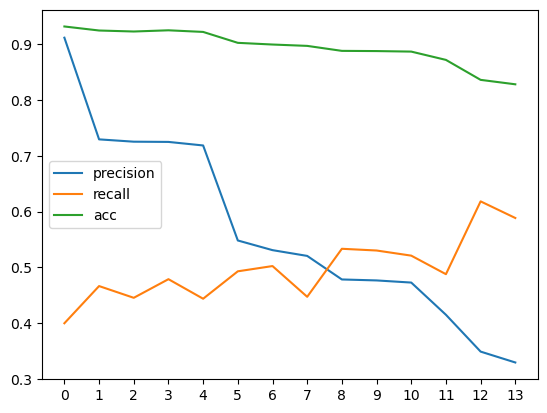

In [17]:
plt.plot(precision_summary.index, precision_summary[['precision','recall','acc']], label=['precision','recall','acc'])
plt.xticks(ticks= [i for i in range(len(precision_summary.index))],labels = [i for i in range(len(precision_summary.index))])
plt.legend()
plt.show()

In [18]:
# find the balanced model
def find_balance(row):
    if row['precision'] > row['recall'] :
        return row['recall'] / row['precision']
    elif row['recall'] > row['precision'] :
        return row['precision'] / row['recall']
    else:
        return 1.0

model_converged['p_r_ratio'] = model_converged.apply(find_balance, axis=1)

model_converged = model_converged.sort_values('p_r_ratio', ascending=False)
model_converged.head(10)

,model_name,model_with_parameter,weight,epoch,alpha,acc,precision,recall,path,p_r_ratio
684,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,34,0.75,0.896283,0.513913,0.513242,models_v3\alpha_0.75_epoch34_acc0.8963_prec0.5...,0.998694
688,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,38,0.75,0.896018,0.512635,0.513474,models_v3\alpha_0.75_epoch38_acc0.8960_prec0.5...,0.998366
436,model_training-v2_weightclamp,model_training-v2_weightclamp_weight_50,50.0,36,None,0.894119,0.503680,0.509527,models_v2\weight_50_epoch36_acc0.8941_prec0.50...,0.988524
683,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,33,0.75,0.895216,0.508749,0.517396,models_v3\alpha_0.75_epoch33_acc0.8952_prec0.5...,0.983288
482,model_training-v2_weightclamp,model_training-v2_weightclamp_weight_100,100.0,32,None,0.897329,0.519188,0.508717,models_v2\weight_100_epoch32_acc0.8973_prec0.5...,0.979833
682,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,32,0.75,0.898885,0.527145,0.506698,models_v3\alpha_0.75_epoch32_acc0.8989_prec0.5...,0.961212
689,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,39,0.75,0.898420,0.524940,0.503279,models_v3\alpha_0.75_epoch39_acc0.8984_prec0.5...,0.958736
695,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,45,0.75,0.898633,0.526172,0.500846,models_v3\alpha_0.75_epoch45_acc0.8986_prec0.5...,0.951869
691,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,41,0.75,0.899436,0.530223,0.503101,models_v3\alpha_0.75_epoch41_acc0.8994_prec0.5...,0.948847
390,model_training-v2_weightclamp,model_training-v2_weightclamp_weight_35,35.0,40,None,0.889907,0.484875,0.512587,models_v2\weight_35_epoch40_acc0.8899_prec0.48...,0.945936


In [38]:
# coppy the best model to current directory for easy access
import shutil
balance_model = model_converged.iloc[1]
shutil.copyfile(os.path.join(current_dir, balance_model['path']), os.path.join(current_dir, 'best_model', 'balance_model_'+balance_model['model_with_parameter']+'_'+str(balance_model['epoch'])+'.pth'))
best_precision_model = model_converged[model_converged['model_with_parameter'] == max_precision_model].sort_values('precision', ascending=False).iloc[0]
shutil.copyfile(os.path.join(current_dir, best_precision_model['path']), os.path.join(current_dir, 'best_model', 'best_precision_model_'+best_precision_model['model_with_parameter']+'_'+str(best_precision_model['epoch'])+'.pth'))
best_recall_model = model_converged[model_converged['model_with_parameter'] == max_recall_model].sort_values('recall', ascending=False).iloc[0]
shutil.copyfile(os.path.join(current_dir, best_recall_model['path']), os.path.join(current_dir, 'best_model','best_recall_model_'+best_recall_model['model_with_parameter']+'_'+str(best_recall_model['epoch'])+'.pth'))

'c:\\Users\\yeech\\Documents\\Project\\low-dense-low-rise\\best_model\\best_recall_model_model_training-v2_restart_noweightclamp_weight_0.75_31.pth'

In [78]:
model_sum_df.to_csv(os.path.join(current_dir, 'model_summary.csv'), index=False)